**Rozdział 1. Krajobraz uczenia maszynowego**

In [46]:
import numpy as np
import numpy.random as rnd
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn.linear_model

In [5]:
# W celu zachowania powtarzalności wyników w kolejnych przebiegach
rnd.seed(42)

In [3]:
# Generowanie ładnych wykresów
%matplotlib inline

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "podstawy"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "rysunki", CHAPTER_ID, fig_id + ".png")
    print("Zapisywanie do pliku", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [4]:
datapath = os.path.join("zestawy danych", "satysfakcja","")
datapath

'zestawy danych\\satysfakcja\\'

In [28]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [56]:
#wczytanie danych
gdp_per_capita = pd.read_csv(datapath + 'gdp_per_capita.csv', thousands=',', delimiter='\t',
                            encoding='latin1', na_values='n/a')
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')

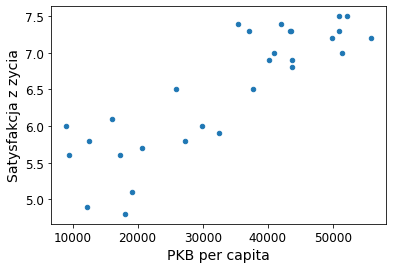

[[5.96242338]]


In [57]:
# Przygotowuje dane
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

country_stats.rename(columns={"GDP per capita": "PKB per capita"}, inplace=True)
country_stats.rename(columns={"Life satisfaction": "Satysfakcja z zycia"}, inplace=True)

# Wizualizuje dane
country_stats.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z zycia')
plt.show()

# Wybiera model liniowy
model = sklearn.linear_model.LinearRegression()

# Uczy model
model.fit(X, y)

# Oblicza prognozy dla Cypru
X_new = [[22587]]  # PKB per capita Cypru
print(model.predict(X_new)) # wyniki [[ 5.96242338]]

#Wczytanie danych i przygotowanie danych satysfakcji z życia